In [1]:
"""
What is the Fourier Transform? (For High Schoolers)
Imagine you're listening to your favorite song. It's a mix of different instruments: maybe a guitar, a drum, and a singer. Your ears hear all these sounds blended together.

Now, imagine you have a magical tool that can take that blended sound and separate it into its individual instruments. So, you can hear just the guitar, then just the drums, and then just the singer.

The Fourier Transform is kind of like that magical tool, but for waves.

Think of any signal that changes over time – like the volume of a sound, the temperature outside, or even the stock market's ups and downs. These signals can be really complex and messy.

The Fourier Transform takes a complex signal (like your blended song) and breaks it down into its individual simple waves. These simple waves are called sine waves and cosine waves.

Why is this useful?

Understanding what's inside: By breaking down a complex signal into simple waves, we can see what frequencies are present and how strong they are. For example, in sound, different frequencies correspond to different pitches.
Cleaning up signals: If you have a lot of noise in a signal (like static on a radio), you can use the Fourier Transform to identify the noise frequencies and remove them.
Analyzing patterns: If there are repeating patterns in your data, the Fourier Transform can help you find them.
Analogy Recap:

Complex Signal: A blended song with many instruments.
Fourier Transform: The magical tool that separates the instruments.
Simple Waves (Sine/Cosine): The individual instruments (guitar, drums, singer).
Output: A list of what instruments are playing and how loud each one is.
So, in simple terms, the Fourier Transform helps us understand the "ingredients" of a signal by showing us which simple waves make it up and how much of each ingredient there is.
"""

'\nWhat is the Fourier Transform? (For High Schoolers)\nImagine you\'re listening to your favorite song. It\'s a mix of different instruments: maybe a guitar, a drum, and a singer. Your ears hear all these sounds blended together.\n\nNow, imagine you have a magical tool that can take that blended sound and separate it into its individual instruments. So, you can hear just the guitar, then just the drums, and then just the singer.\n\nThe Fourier Transform is kind of like that magical tool, but for waves.\n\nThink of any signal that changes over time – like the volume of a sound, the temperature outside, or even the stock market\'s ups and downs. These signals can be really complex and messy.\n\nThe Fourier Transform takes a complex signal (like your blended song) and breaks it down into its individual simple waves. These simple waves are called sine waves and cosine waves.\n\nWhy is this useful?\n\nUnderstanding what\'s inside: By breaking down a complex signal into simple waves, we can

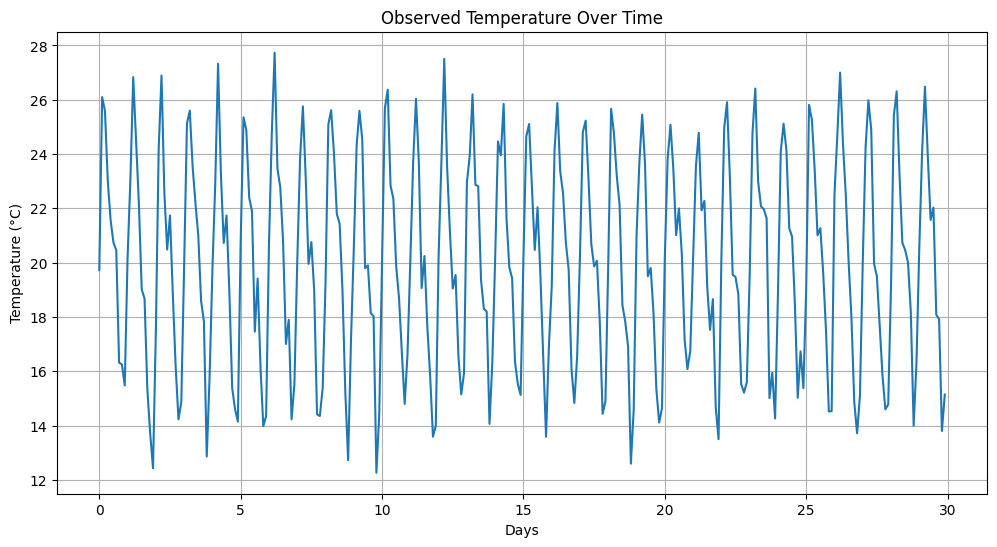

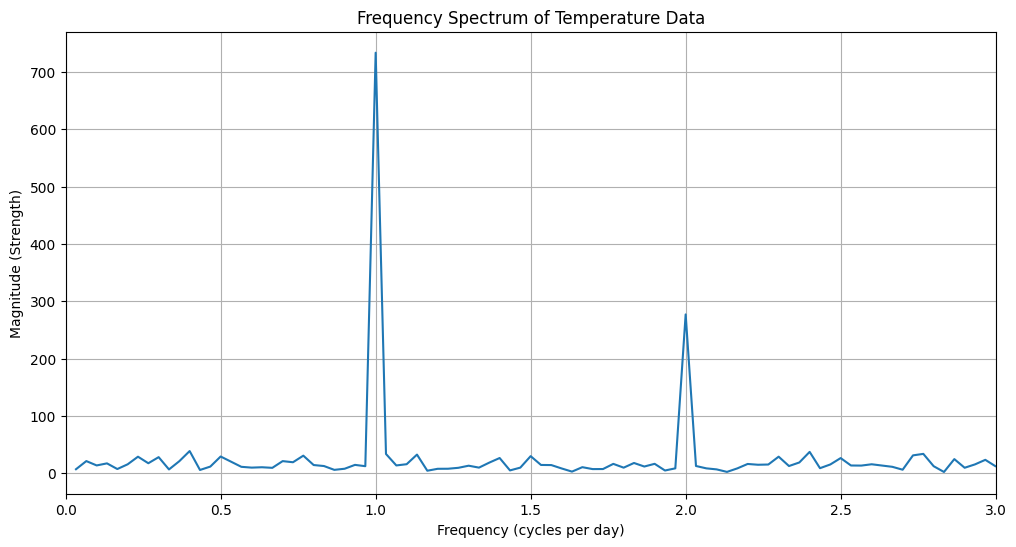


Dominant Frequencies and their Magnitudes:
Frequency: 3.60 cycles/day, Magnitude: 48.65
Frequency: 2.00 cycles/day, Magnitude: 277.01
Frequency: 1.00 cycles/day, Magnitude: 733.75

Corresponding Periods:
Period: 0.28 days (repeats every 0.28 days)
Period: 0.50 days (repeats every 0.50 days)
Period: 1.00 days (repeats every 1.00 days)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create some sample time series data
# Let's imagine daily temperature readings over 30 days
# We'll add a dominant daily cycle, a weaker half-day cycle, and some random noise

days = np.arange(0, 30, 0.1) # 30 days, reading every 0.1 day (2.4 hours)
# A daily temperature cycle (e.g., warmer in the afternoon)
temperature_daily_cycle = 5 * np.sin(2 * np.pi * days / 1) # Period of 1 day

# A weaker half-day cycle (e.g., a slight dip in temp midday)
temperature_half_day_cycle = 2 * np.sin(2 * np.pi * days / 0.5) # Period of 0.5 days

# Some random "noise"
noise = np.random.normal(0, 1, len(days))

# Combine them to get our "observed" temperature data
observed_temperature = 20 + temperature_daily_cycle + temperature_half_day_cycle + noise

plt.figure(figsize=(12, 6))
plt.plot(days, observed_temperature)
plt.title('Observed Temperature Over Time')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# 2. Perform the Fourier Transform
# np.fft.fft computes the Discrete Fourier Transform (DFT)
# which is the version we use for sampled data
N = len(observed_temperature) # Number of data points
yf = np.fft.fft(observed_temperature) # The actual Fourier Transform result
xf = np.fft.fftfreq(N, 0.1) # The frequencies corresponding to the yf results (0.1 is our sampling interval)

# We are usually interested in the positive frequencies, as the negative ones are just mirror images
# And we want the strength (magnitude) of each frequency component
positive_frequencies_mask = xf > 0
frequencies = xf[positive_frequencies_mask]
magnitudes = np.abs(yf[positive_frequencies_mask])

# 3. Plot the results of the Fourier Transform (the "spectrum")
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitudes)
plt.title('Frequency Spectrum of Temperature Data')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Magnitude (Strength)')
plt.grid(True)
plt.xlim(0, 3) # Let's focus on frequencies up to 3 cycles per day
plt.xticks(np.arange(0, 3.5, 0.5)) # Adjust x-axis ticks for better readability
plt.show()

# 4. Interpret the results
# What do the peaks in the frequency spectrum mean?
# A peak at frequency = 1 means there's a strong component that repeats once per day.
# A peak at frequency = 2 means there's a strong component that repeats twice per day (i.e., every 0.5 days).

# Find the dominant frequencies
peak_indices = np.argsort(magnitudes)[-3:] # Get indices of the top 3 peaks
dominant_frequencies = frequencies[peak_indices]
dominant_magnitudes = magnitudes[peak_indices]

print("\nDominant Frequencies and their Magnitudes:")
for i in range(len(dominant_frequencies)):
    print(f"Frequency: {dominant_frequencies[i]:.2f} cycles/day, Magnitude: {dominant_magnitudes[i]:.2f}")

# Convert frequencies to periods (how long it takes for one cycle)
# Period = 1 / Frequency
print("\nCorresponding Periods:")
for i in range(len(dominant_frequencies)):
    period = 1 / dominant_frequencies[i]
    print(f"Period: {period:.2f} days (repeats every {period:.2f} days)")

In [3]:
"""
3 Questions for You:
Imagine you analyze a sound recording using the Fourier Transform, and you see a very strong peak at 440 Hz (Hertz, cycles per second). What would that tell you about the sound?
If you have a time series of a student's daily study hours and you perform a Fourier Transform, and you find a strong peak at a frequency of 0.14 cycles per day. What would that tell you about the student's study habits? (Hint: Think about what 1 / 0.14 would represent).
Why is the Fourier Transform considered useful for "cleaning up" noisy signals, even though it doesn't directly remove the noise from the original time data?
"""

'\n3 Questions for You:\nImagine you analyze a sound recording using the Fourier Transform, and you see a very strong peak at 440 Hz (Hertz, cycles per second). What would that tell you about the sound?\nIf you have a time series of a student\'s daily study hours and you perform a Fourier Transform, and you find a strong peak at a frequency of 0.14 cycles per day. What would that tell you about the student\'s study habits? (Hint: Think about what 1 / 0.14 would represent).\nWhy is the Fourier Transform considered useful for "cleaning up" noisy signals, even though it doesn\'t directly remove the noise from the original time data?\n'